In [50]:
import json

In [51]:
import os

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
adj[0]

{'13719': []}

In [66]:
def get_plots(adj, ax):
    edges = [(int(k), int(v)) for k, l in adj.items() for v in l]
    all_nodes = {int(k) for k in adj}
    all_nodes = sorted(all_nodes)

    for a, b in edges:
        k1, k2 = all_nodes.index(a), all_nodes.index(b)
        degs = [k1/(len(all_nodes)) * 2 * np.pi, k2/(len(all_nodes)) * 2 * np.pi]
        ax.plot(np.cos(degs), np.sin(degs))
    for node in all_nodes:
        deg = all_nodes.index(node)/(len(all_nodes)) * 2 * np.pi
        c, s = np.cos(deg)*1.1, np.sin(deg)*1.1
        ax.text(c, s, node,
                horizontalalignment = 'center',
                verticalalignment = 'center')
    t = np.linspace(0, 2*np.pi, 100)
    #ax.plot(np.cos(t), np.sin(t))

In [75]:
with open(os.path.join(os.getcwd(),'data.json'), 'r') as f:
    adj = json.load(f)

In [78]:
figs_path = os.path.join(os.getcwd(), 'figs')

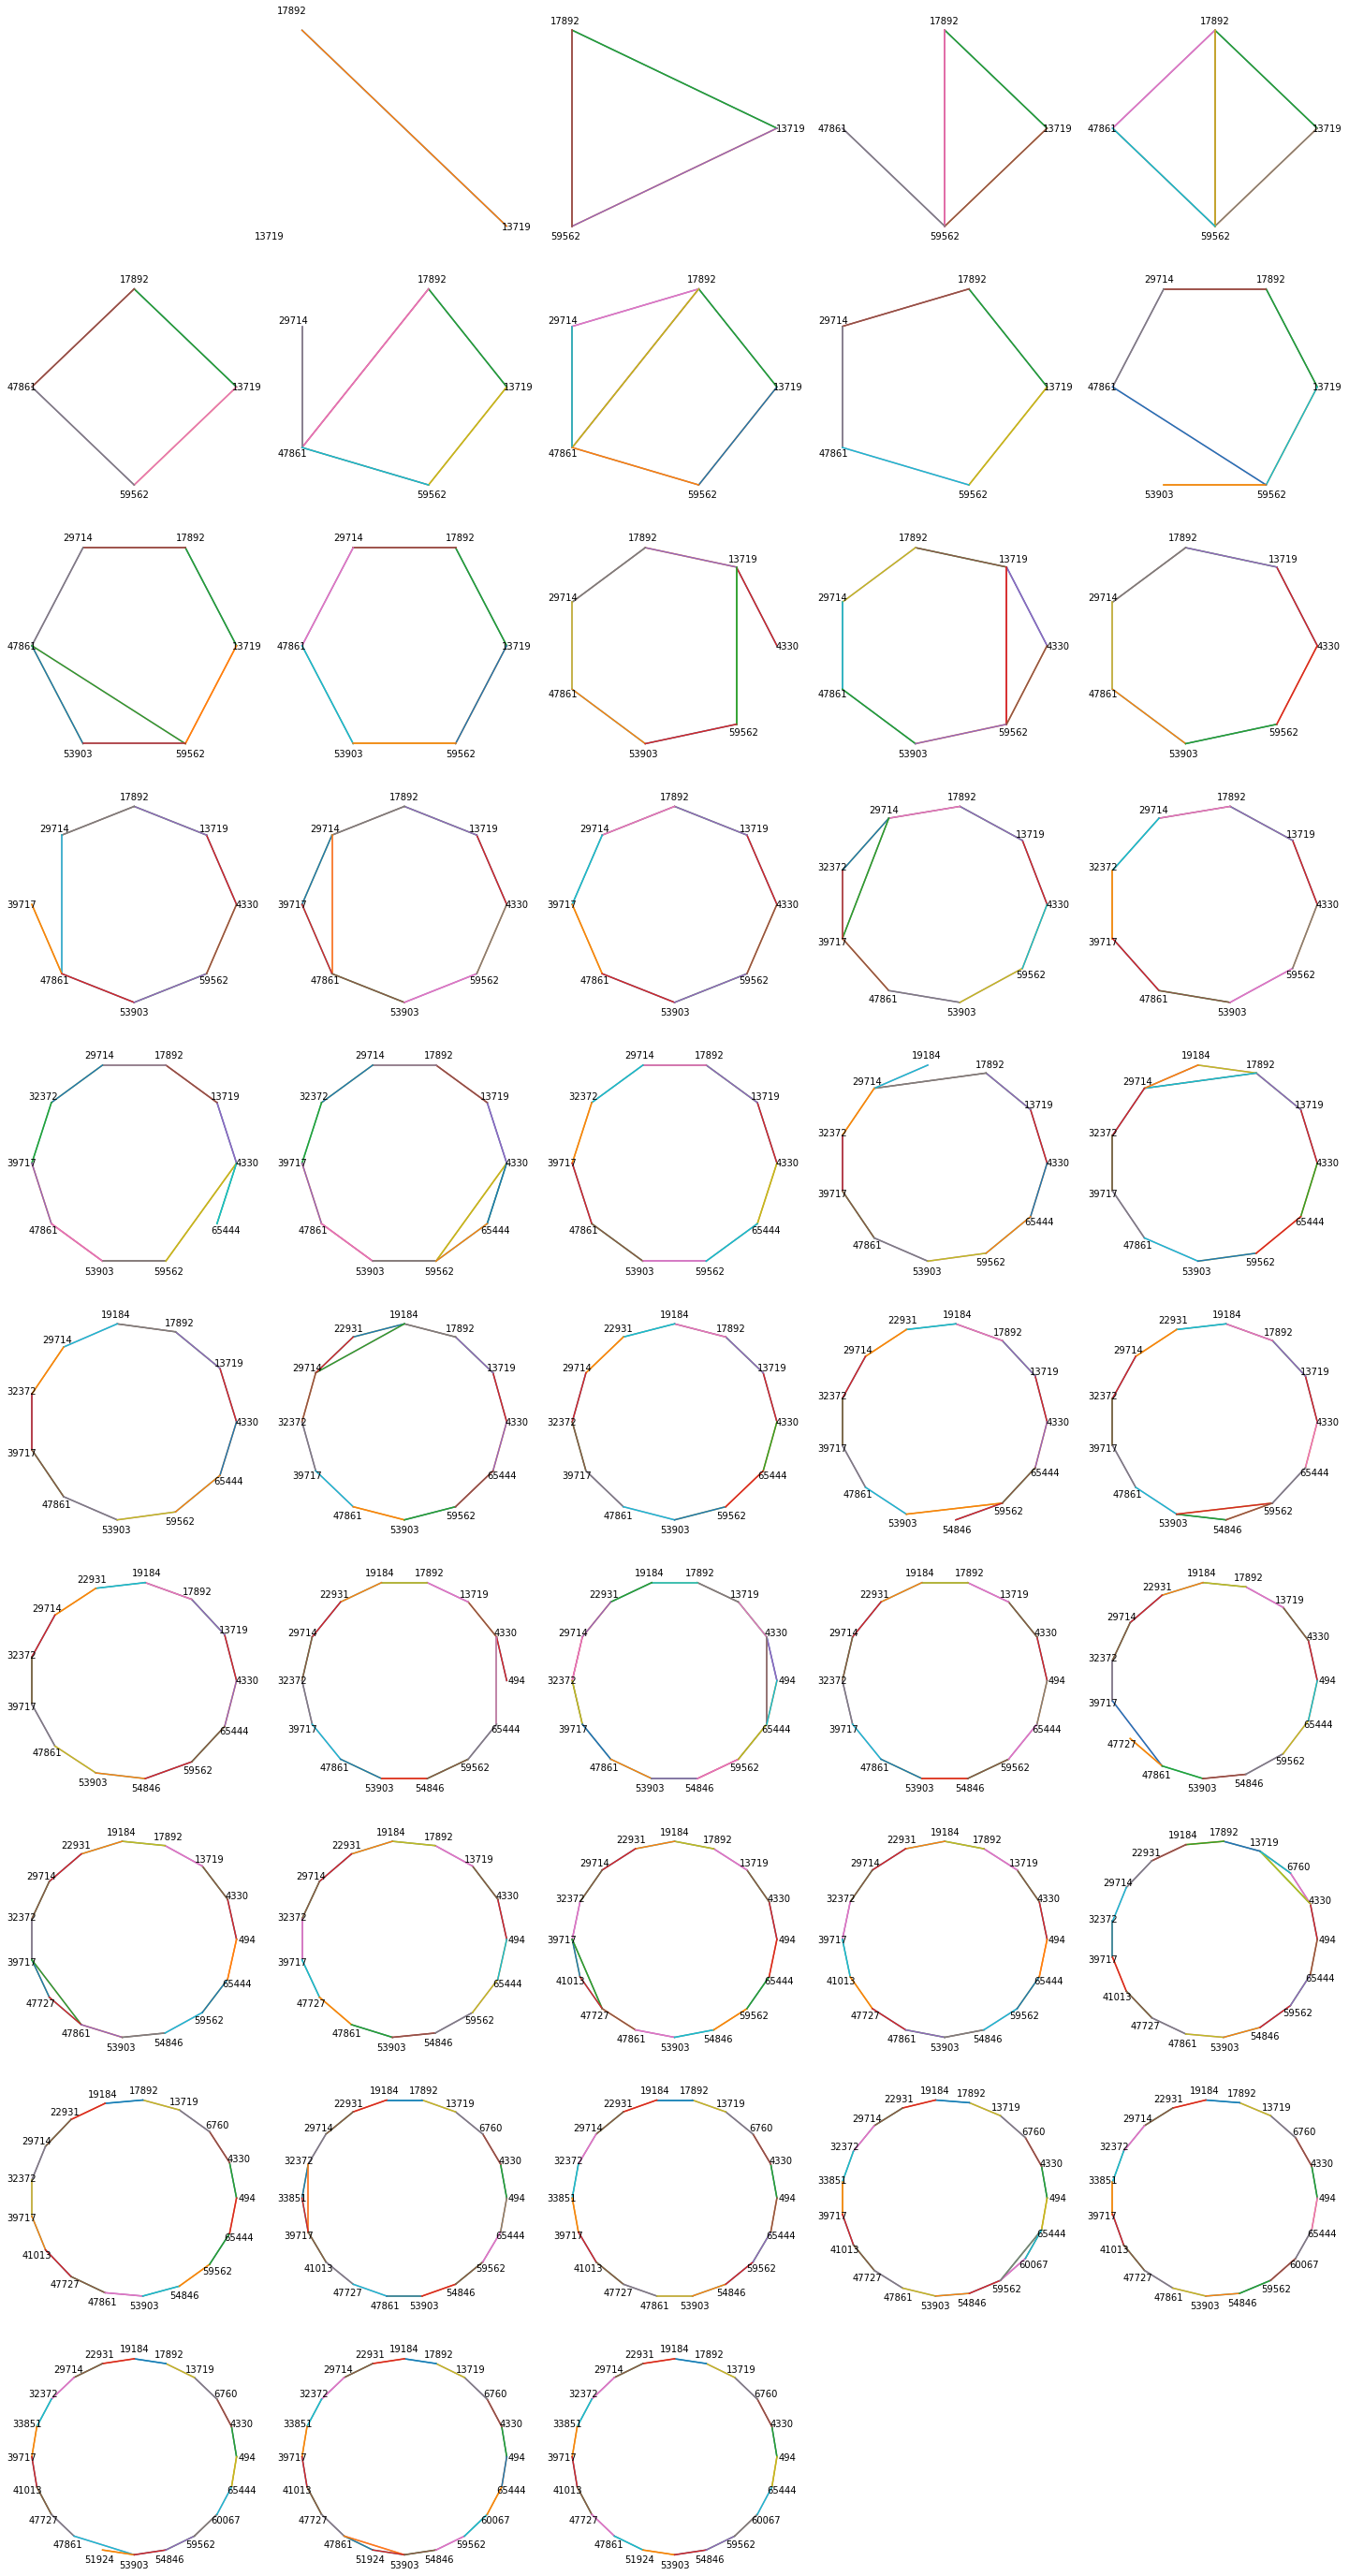

In [79]:
fig, ax = plt.subplots(int(np.ceil(len(adj)/5)), 5, figsize=(25,len(adj) + 5 - (len(adj) % 5)))
for a, axi in zip(adj, ax.flatten()):
    get_plots(a, axi)
for axi in ax.flatten():
    axi.axis('off')
plt.savefig(os.path.join(figs_path, 'chord-ring.png'))
plt.show()